In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("DS1_C4_S5_Employee_Data_Practice.xlsx",sheet_name = 0)
data

,Employee_Code,Gender,Department,Annual Salary ($),Age,Work_Experience
0,1010,Male,IT,27000,22,0
1,1011,Female,IT,48000,27,4
2,1012,Male,Sales,75000,31,7
3,1013,Male,Sales,61000,29,6
4,1014,Female,Finance,45000,27,4
...,...,...,...,...,...,...
65,1074,Female,HR,82500,43,13
66,1075,Male,Sales,53500,28,5
67,1076,Female,HR,57000,29,6
68,1077,Male,Sales,66500,33,7


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Employee_Code      70 non-null     int64 
 1   Gender             70 non-null     object
 2   Department         70 non-null     object
 3   Annual Salary ($)  70 non-null     int64 
 4   Age                70 non-null     int64 
 5   Work_Experience    70 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 3.4+ KB


Task 1
What is the total annual salary for all the employees of each department? Display the result using a bar graph.
Hint:
i) Summarize the department-wise sum of annual salaries.
Use index and values properties of the summarized data to plot the bar graphs

In [4]:
groupwise= data.groupby(by= ["Department"])["Annual Salary ($)"].sum()

In [5]:
groupwise

Department
Finance     790000
HR          987000
IT         1282900
Sales      1089000
Name: Annual Salary ($), dtype: int64

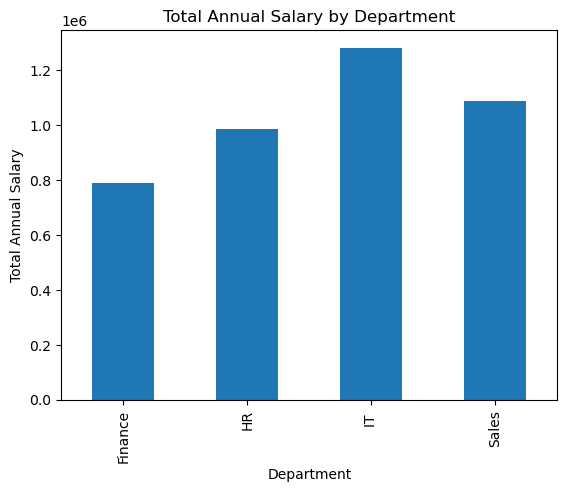

In [6]:
groupwise.plot(kind="bar")
plt.xlabel('Department')
plt.ylabel('Total Annual Salary')
plt.title('Total Annual Salary by Department')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

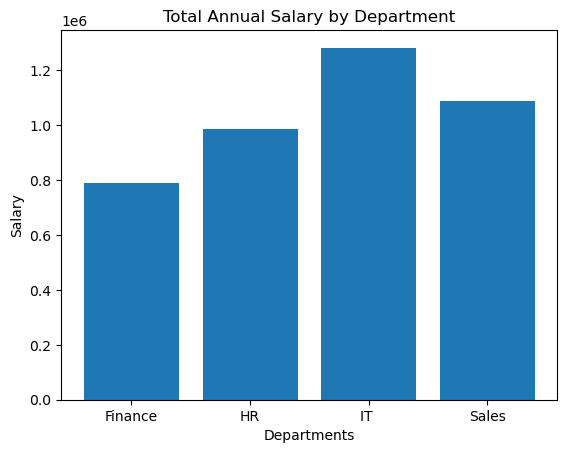

In [7]:
plt.bar(groupwise.index,groupwise.values)
plt.title("Total Annual Salary by Department")
plt.xlabel("Departments")
plt.ylabel("Salary")
plt.show

Task 2
The company wants to analyze gender equality across several departments. Display the department-wise total number of male and female employees using a DataFrame.
Hints:
Summarize the department- and gender-wise count of employees.
Create a DataFrame with all department names and the respective male and female counts.

In [8]:
Genderwise_department=pd.crosstab(data.Department, data.Gender, rownames = ['Department'], colnames= ["Gender"], values = data.Department,aggfunc = "count")

In [9]:
Genderwise_department

Gender,Female,Male
Department,,
Finance,2,11
HR,11,4
IT,10,12
Sales,4,16


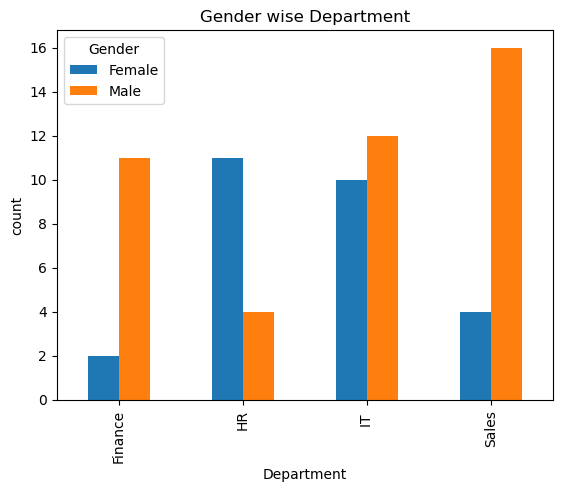

In [10]:
Genderwise_department.plot(kind="bar")
plt.title("Gender wise Department")
plt.ylabel("count")
plt.show()

Task 3
What salary do you think the company might offer a new employee (a candidate with no work experience) of the IT department?
Hint:
i) Apply a filter on the data where work experience is 0 and the department is IT.
ii) Calculate the average of salaries of filtered data.

In [11]:
z = data[(data["Work_Experience"]==0) &  (data["Department"]=="IT " )]
z

,Employee_Code,Gender,Department,Annual Salary ($),Age,Work_Experience
0,1010,Male,IT,27000,22,0
7,1017,Male,IT,28000,23,0
12,1022,Male,IT,29000,22,0
46,1055,Male,IT,27500,22,0
47,1056,Female,IT,29000,23,0


In [12]:
z["Annual Salary ($)"].mean()

28100.0

Task 4
Display the department-wise ratio for the sum of annual salaries for all employees in each department, using a pie chart.
Hint:
i) Summarize data (annual salary) by department. ii) Use index and values properties of the summarized
data to plot the pie chart.
ill) Set the 'autopct' attribute value of the pie chart to
'%.2f %%

In [13]:
sal = data.groupby(by=["Department"])["Annual Salary ($)"].sum()
sal

Department
Finance     790000
HR          987000
IT         1282900
Sales      1089000
Name: Annual Salary ($), dtype: int64

<Axes: ylabel='Annual Salary ($)'>

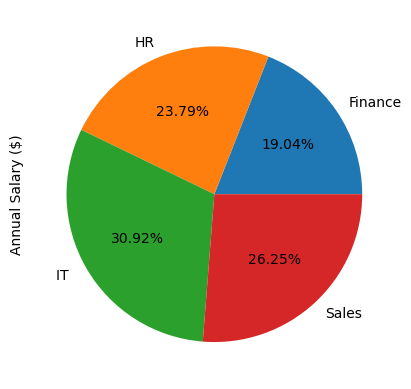

In [14]:
sal.plot(kind="pie",autopct ="%0.2f%%")

In [15]:
#method 2 to make pie chart

([<matplotlib.patches.Wedge at 0x238274b3710>,
 [Text(0.9089877668487375, 0.6194685139047388, 'Finance'),
  Text(-0.400815236095585, 1.024376467180714, 'HR'),
  Text(-0.9540753036420191, -0.5474854472772671, 'IT '),
  Text(0.7467336367070757, -0.8077059339946842, 'Sales')],
 [Text(0.4958115091902204, 0.337891916675312, '19.04%'),
  Text(-0.21862649241577362, 0.5587508002803894, '23.79%'),
  Text(-0.5204047110774649, -0.2986284257876002, '30.92%'),
  Text(0.40730925638567766, -0.4405668730880095, '26.25%')])

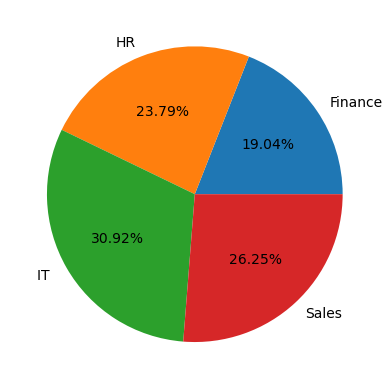

In [16]:
plt.pie(x=sal.values, labels=sal.index, autopct ="%0.2f%%")

Task 5
Display the distribution of employee count by age group using a histogram.
Hint: Plot age group buckets (bins) on the x-axis and number of employees on the y axis. Choose the bin size as 25-30, 30-35, and so on, all the way up to 50.

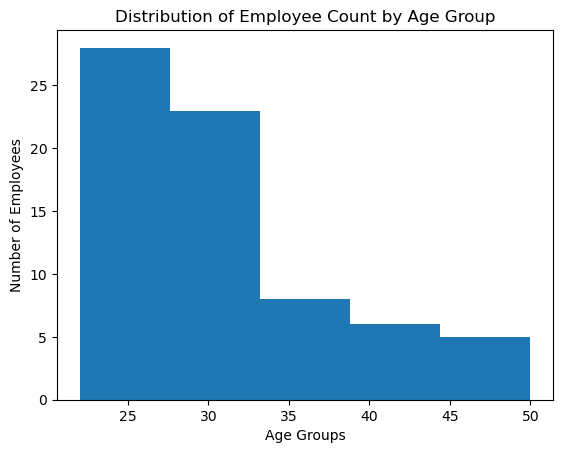

In [17]:
plt.hist(data.Age, bins=5)
plt.xlabel('Age Groups')
plt.ylabel('Number of Employees')
plt.title('Distribution of Employee Count by Age Group');

Task 6
Display the salary trend based on employee experience using a scatterplot

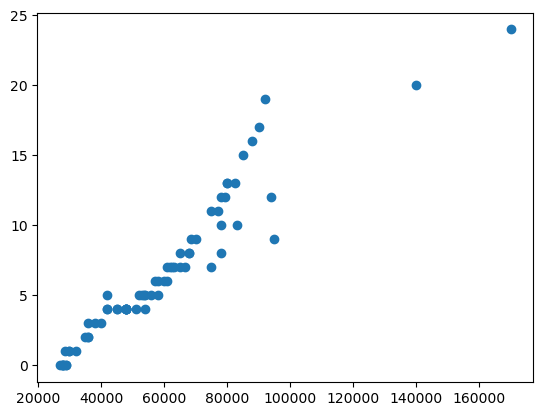

In [18]:
plt.scatter(data["Annual Salary ($)"],data["Work_Experience"])                #scatterplot

Task 7
Determine the department-wise spread of all employees' salaries using a separate box plot for each department.
Identify and write down the names of the departments in which there are outliers in employee salary.

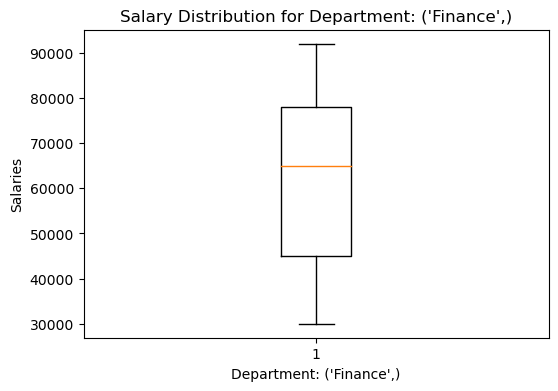

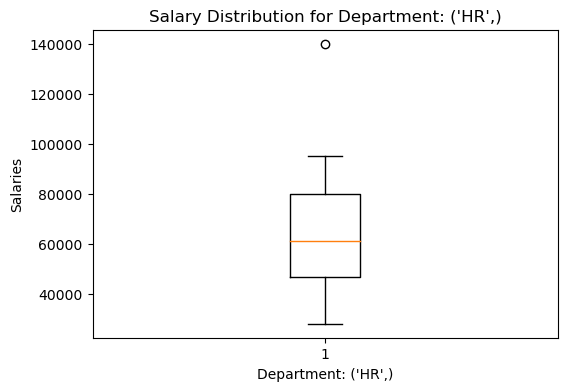

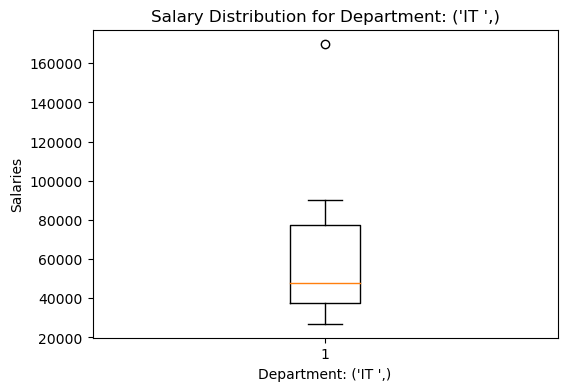

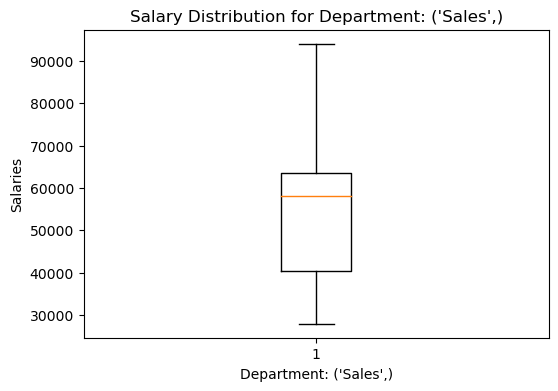

In [21]:
for department, salary in dept:
    plt.figure(figsize=(6, 4))  # Adjust figure size as needed
    plt.boxplot(salary["Annual Salary ($)"])
    plt.ylabel("Salaries")
    plt.xlabel("Department: " + str(department))  # Convert department tuple to string
    plt.title("Salary Distribution for Department: " + str(department))  # Convert department tuple to string
    plt.show()

In [ ]:
#HR and IT has outliers